In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')

In [ ]:
data = pd.read_excel("Maintenance.xlsx")
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

#### Describe the Data

In [ ]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


- from tabel you can see that data have a normal distribute

#### Check for missing values

In [ ]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

#### Dropping the ID and product ID column

In [ ]:
data.drop(["UDI","Product ID"] ,axis =1 , inplace =True)

In [ ]:
data

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


#### Check for duplicate values

In [ ]:
data[data.duplicated()]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


In [ ]:
data["Machine failure"].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

- Data is imbalanced

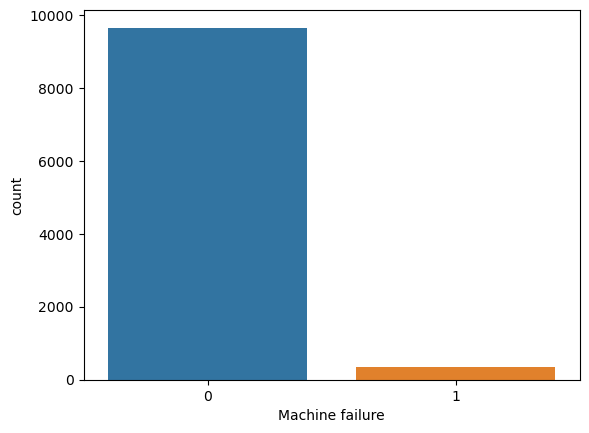

In [ ]:
sns.countplot(x=data["Machine failure"])
plt.show()

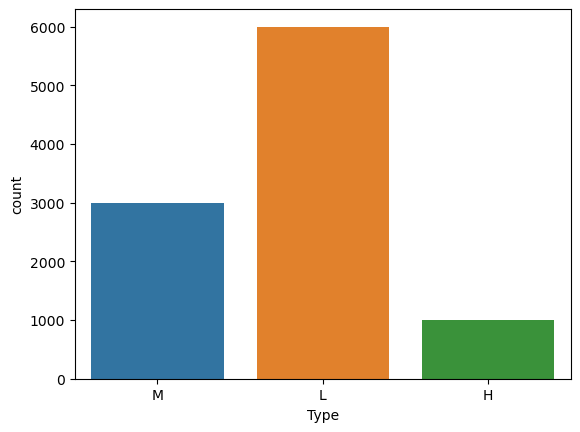

In [ ]:
sns.countplot(x= data["Type"])
plt.show()

#### Histogram

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

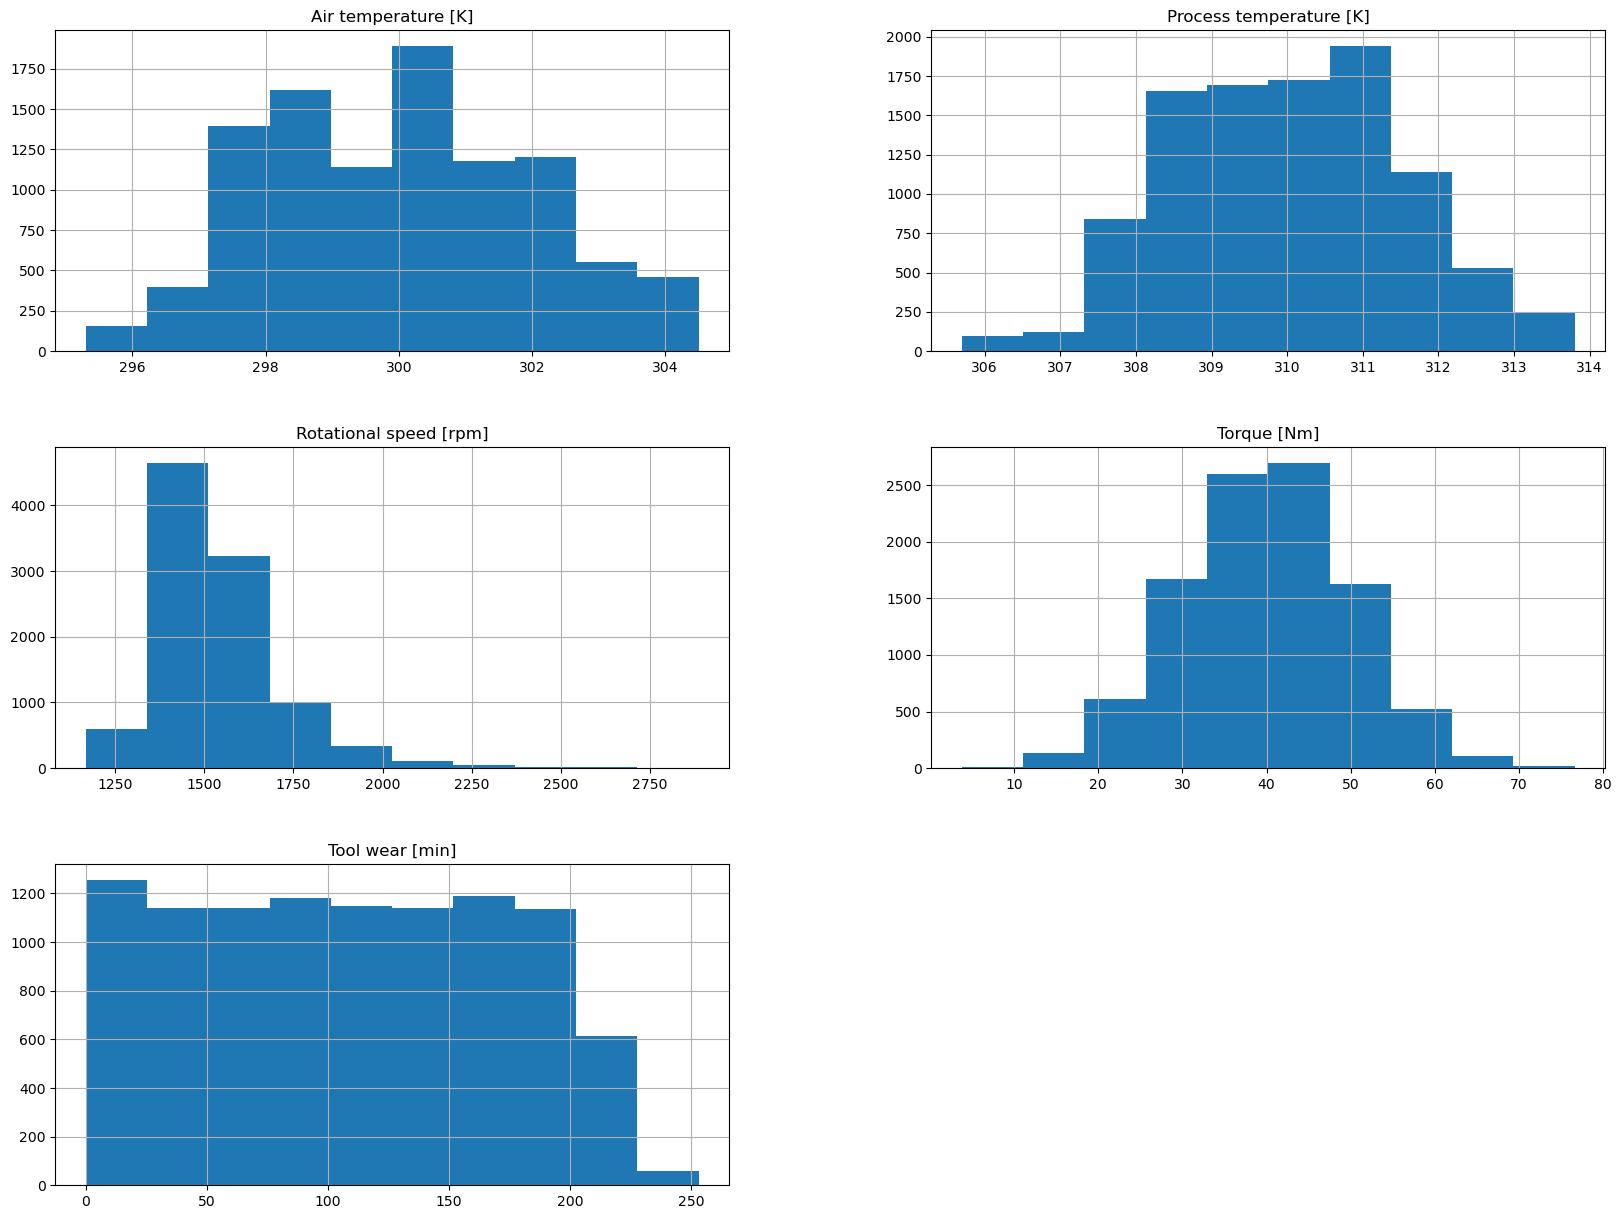

In [ ]:
data[["Air temperature [K]" ,"Process temperature [K]","Rotational speed [rpm]",
        "Torque [Nm]","Tool wear [min]"]].hist(figsize=(20, 15))

#### Boxplot for checking the outliers

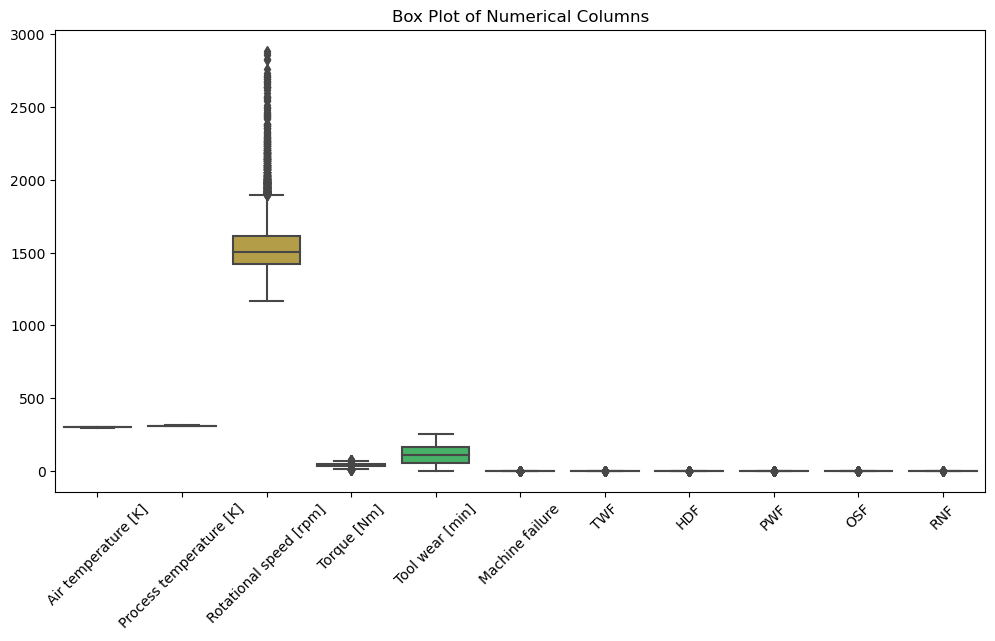

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

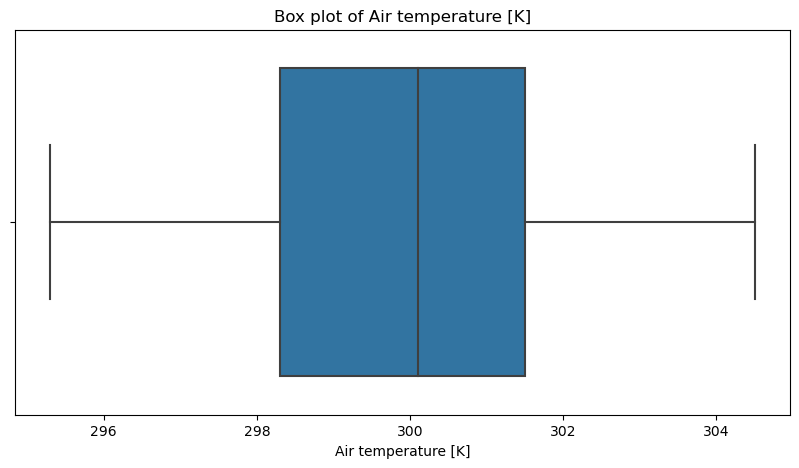

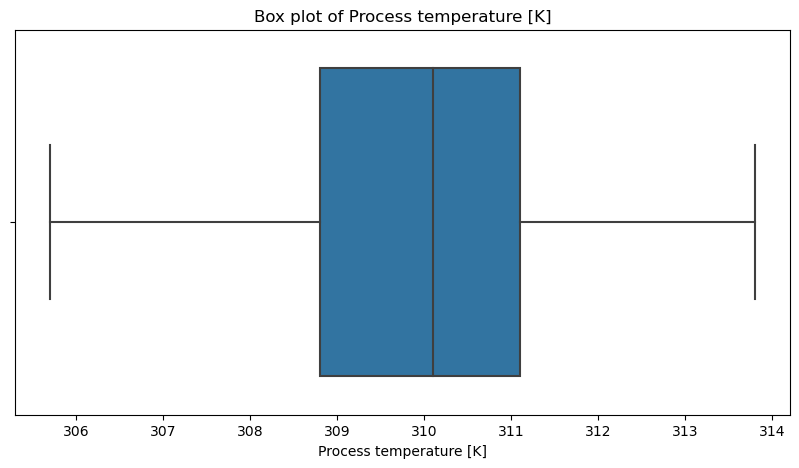

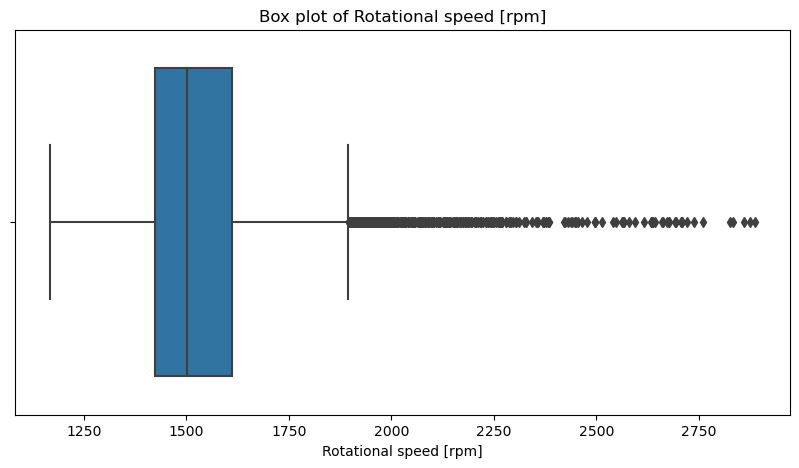

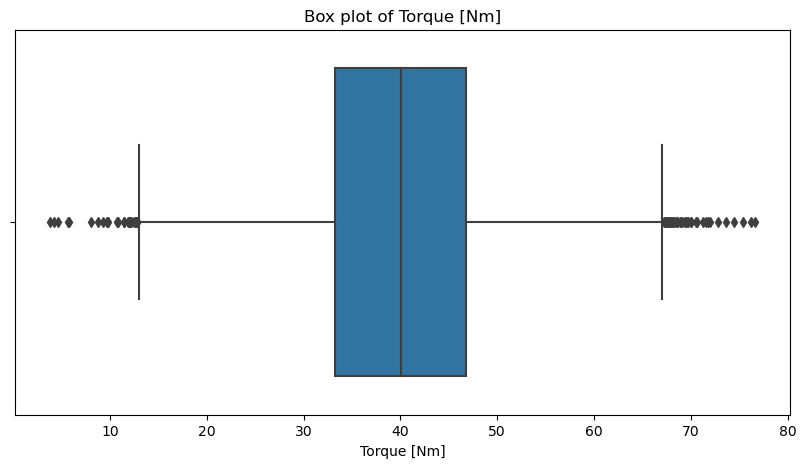

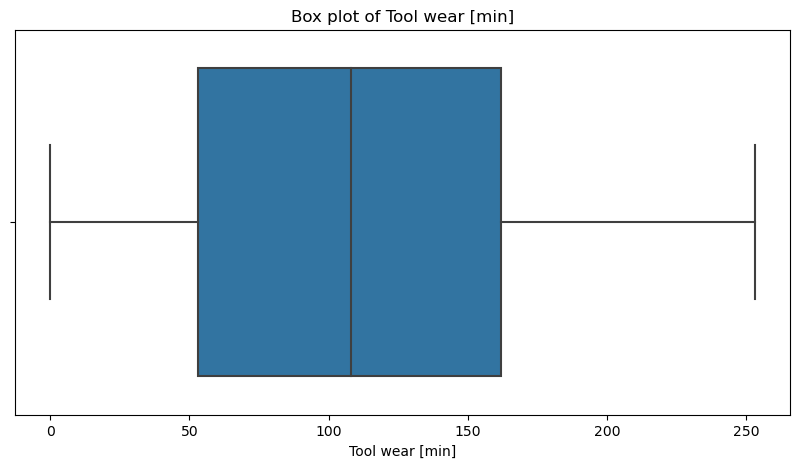

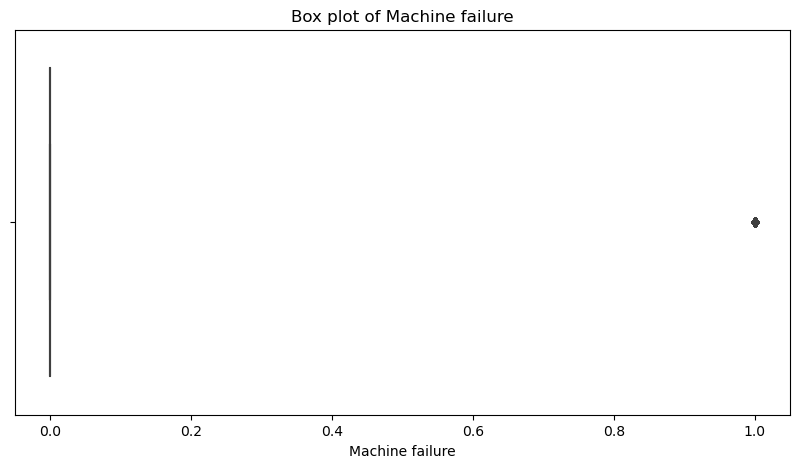

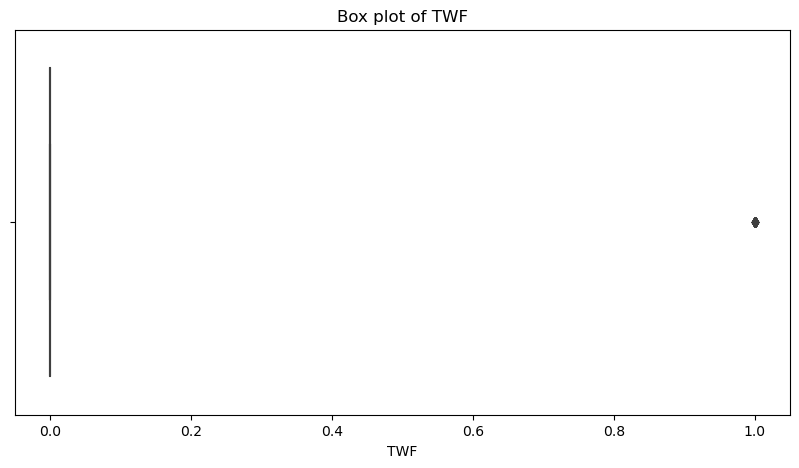

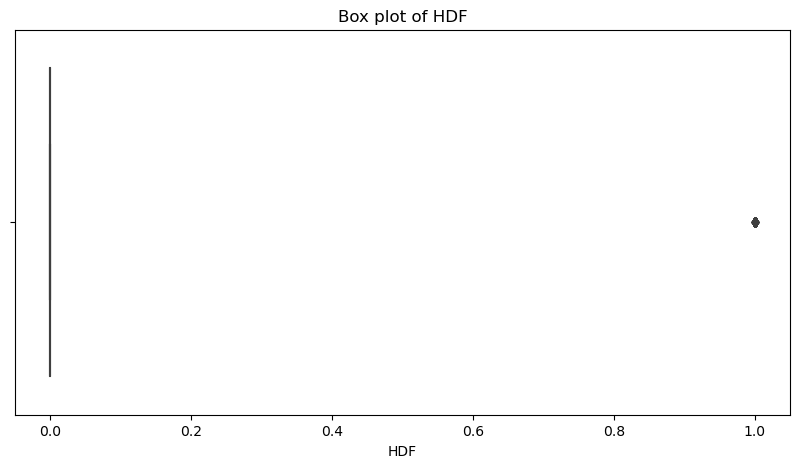

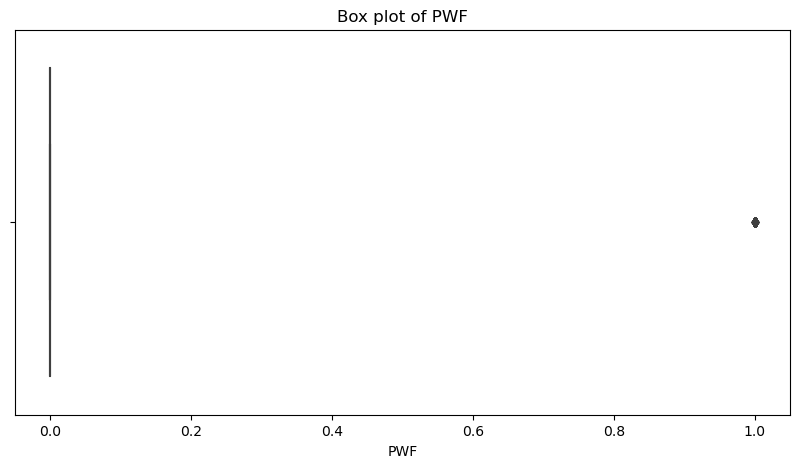

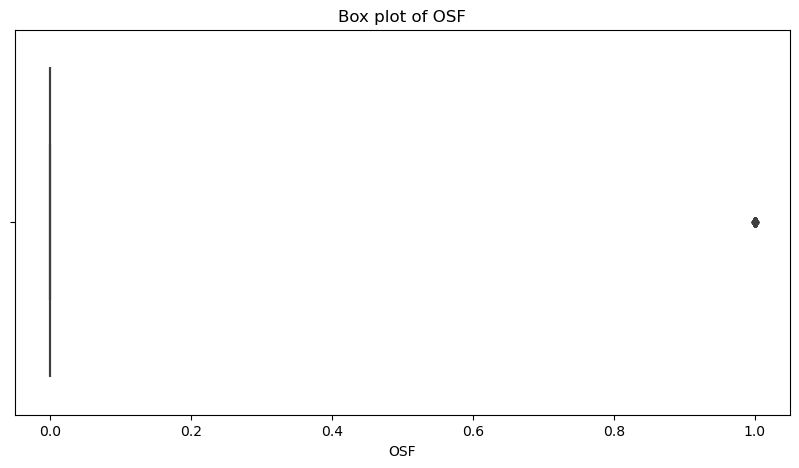

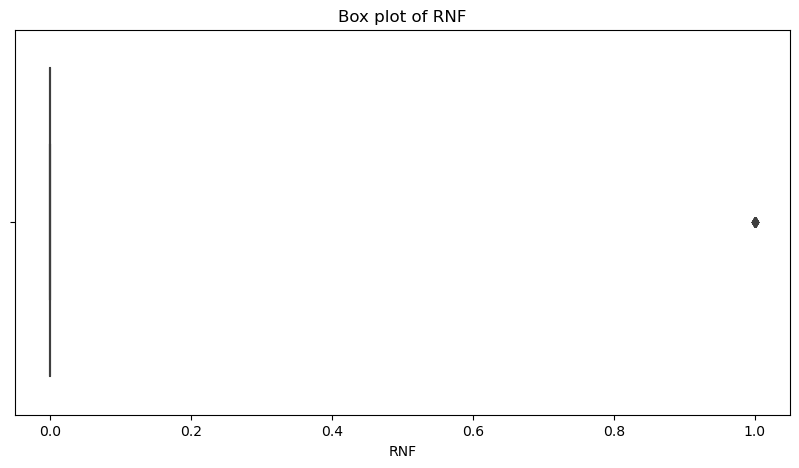

In [ ]:
def plot_boxplots(data):
    for column in data.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data[column])
        plt.title(f'Box plot of {column}')
        plt.show()

plot_boxplots(data)

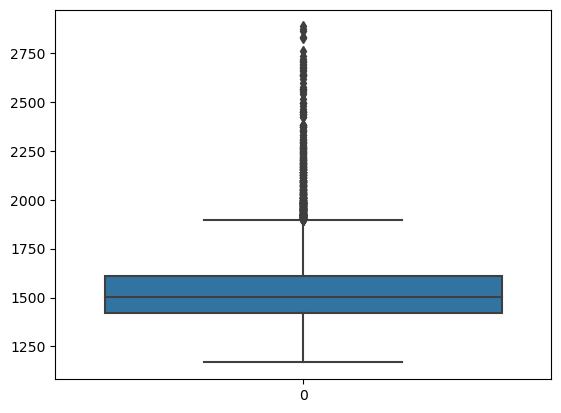

In [ ]:
sns.boxplot(data=data['Rotational speed [rpm]'])
plt.show()

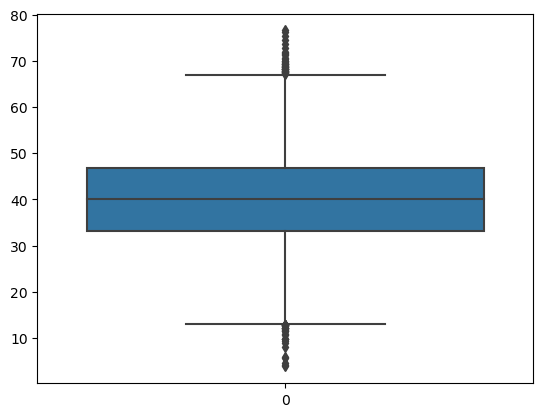

In [ ]:
sns.boxplot(data=data['Torque [Nm]'])
plt.show()

In [ ]:
columns_to_check = ['Rotational speed [rpm]', 'Torque [Nm]']

In [ ]:
def cap_floor_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

data_new = cap_floor_outliers(data.copy(), columns_to_check)

#### Boxplot after Outliers removed

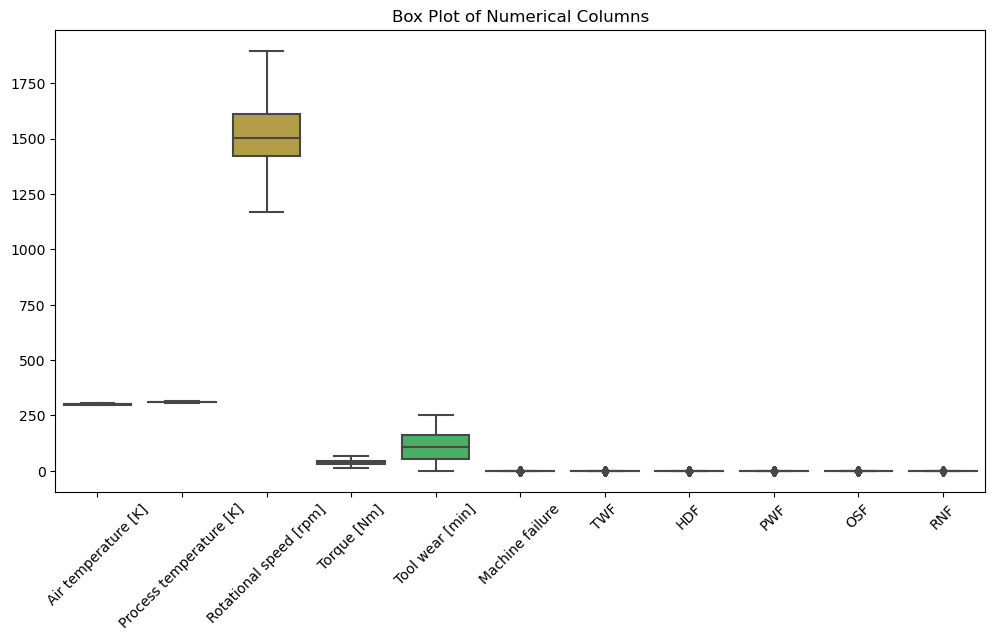

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_new)
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

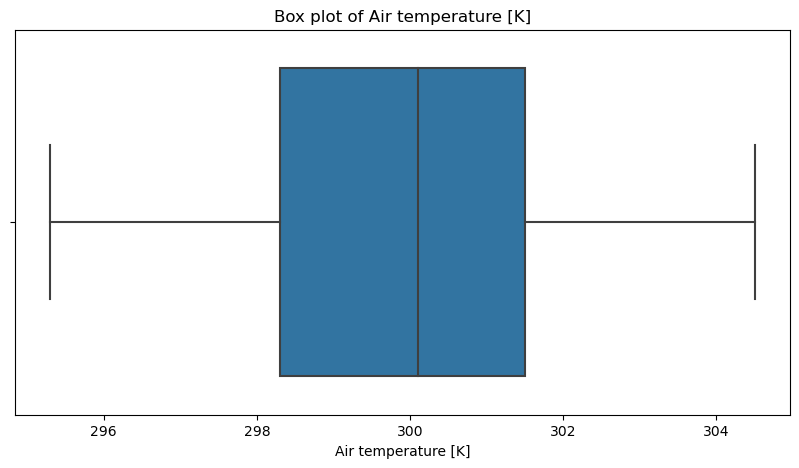

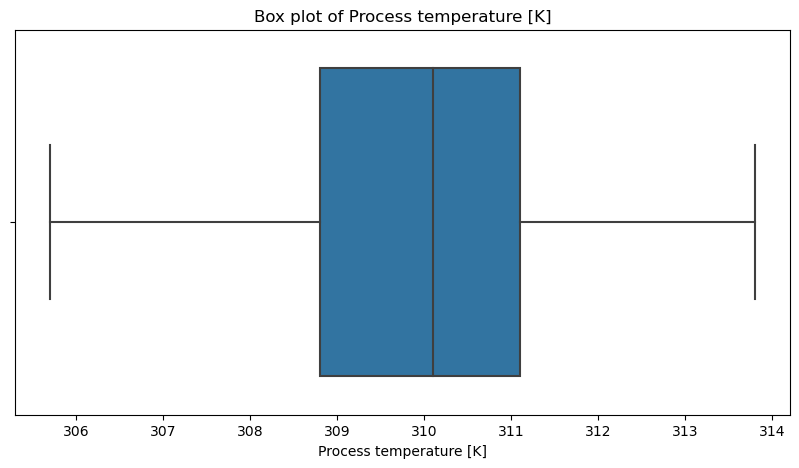

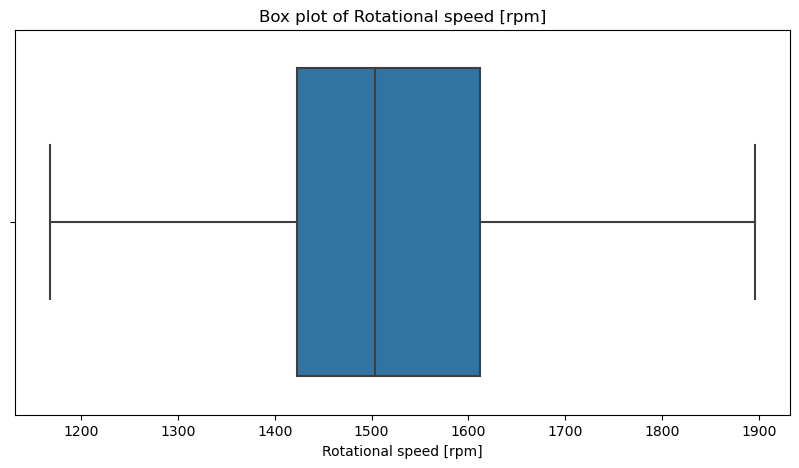

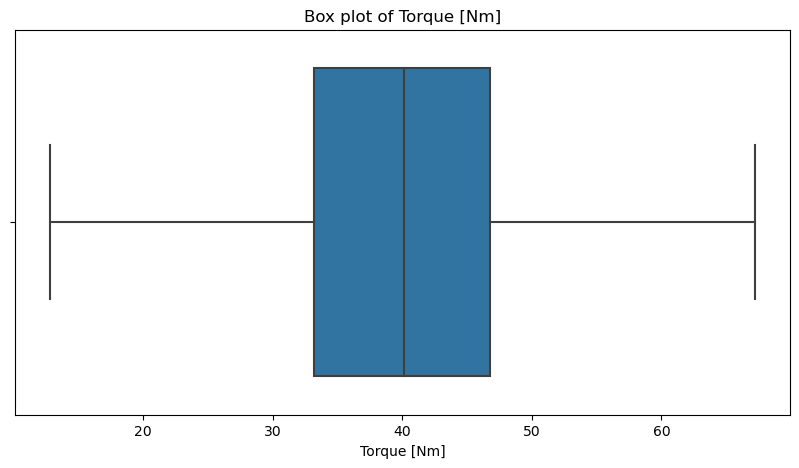

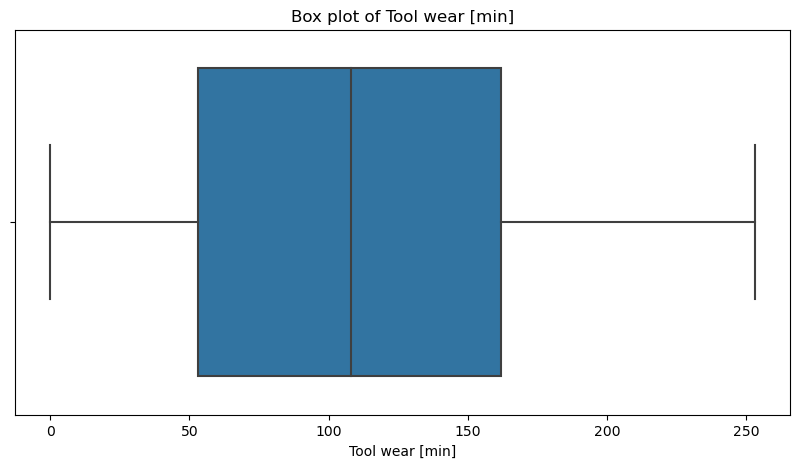

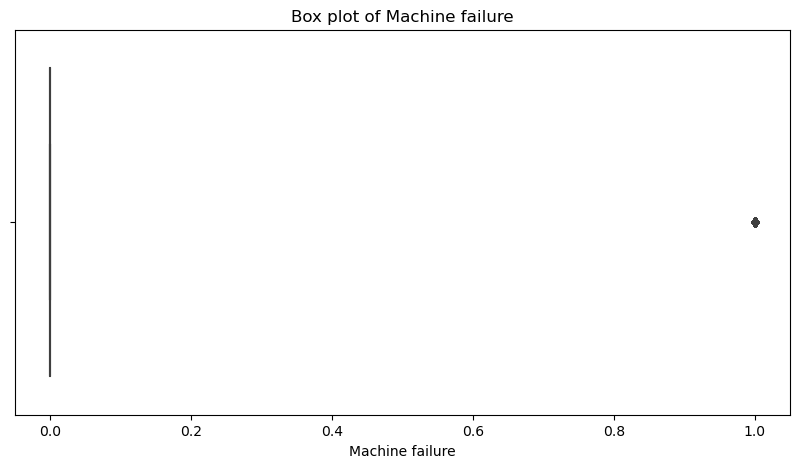

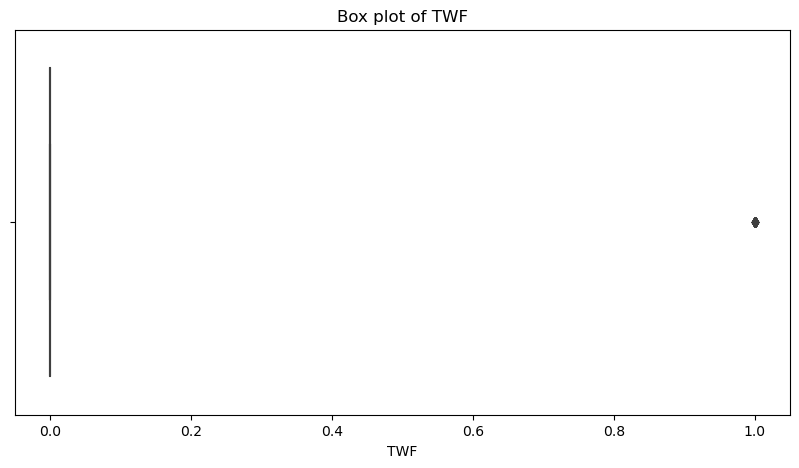

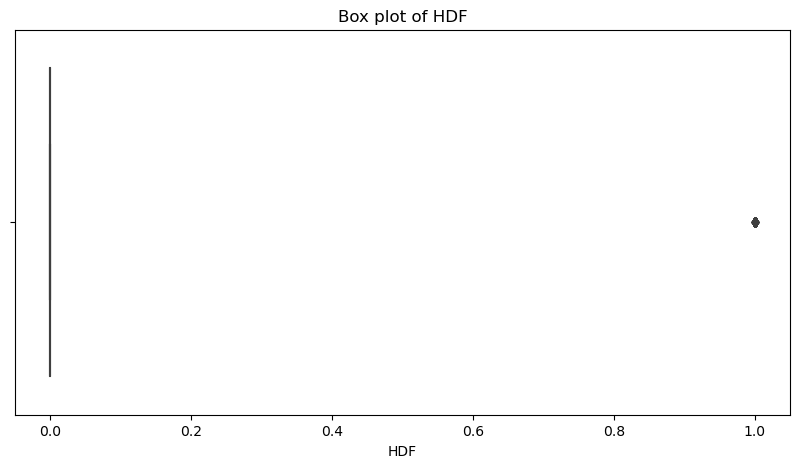

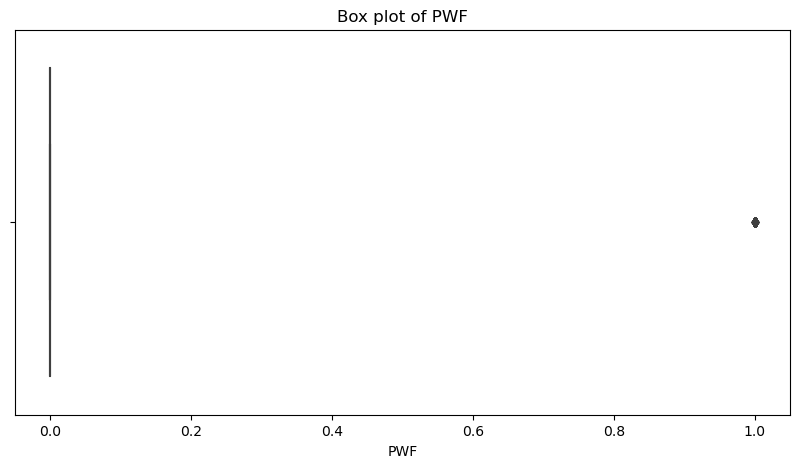

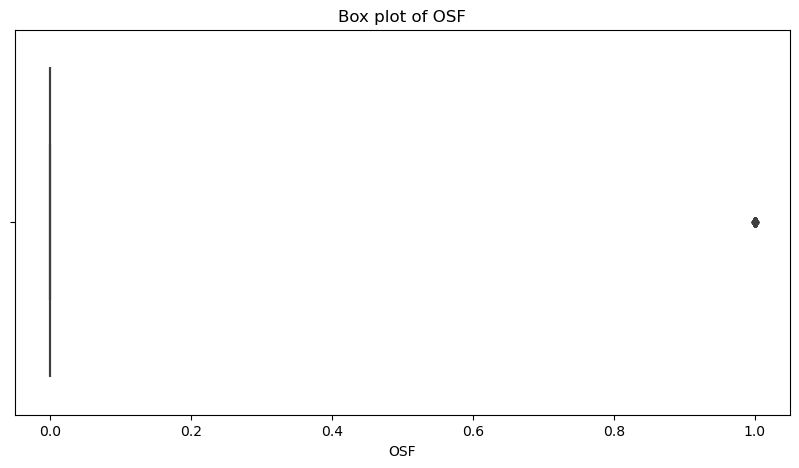

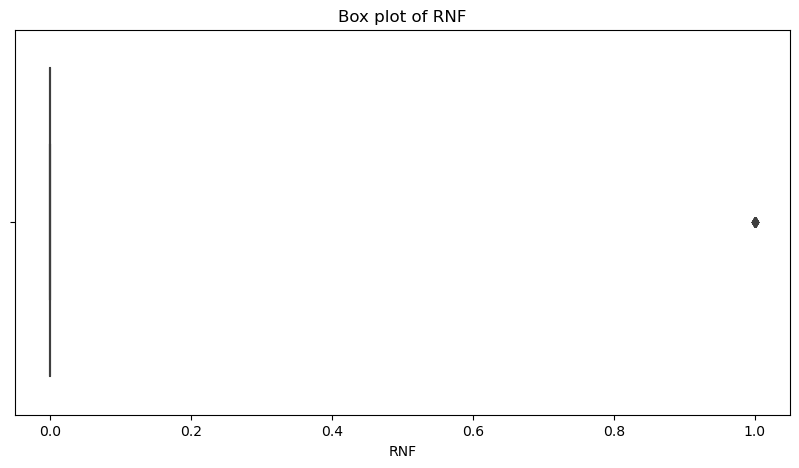

In [ ]:
def plot_boxplots(data_new):
    for column in data_new.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=data_new[column])
        plt.title(f'Box plot of {column}')
        plt.show()

plot_boxplots(data_new)

#### Checking distribution by Machine Failure

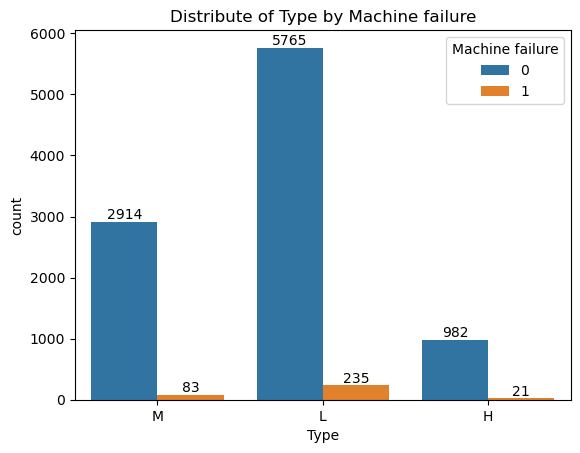

In [ ]:
figure = sns.countplot(x= data_new["Type"] , hue = data_new['Machine failure'] )
for cotain in figure.containers : 
    figure.bar_label(cotain)
plt.title("Distribute of Type by Machine failure")
plt.show()

#### Pairplot for variables

C:\Users\prati\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


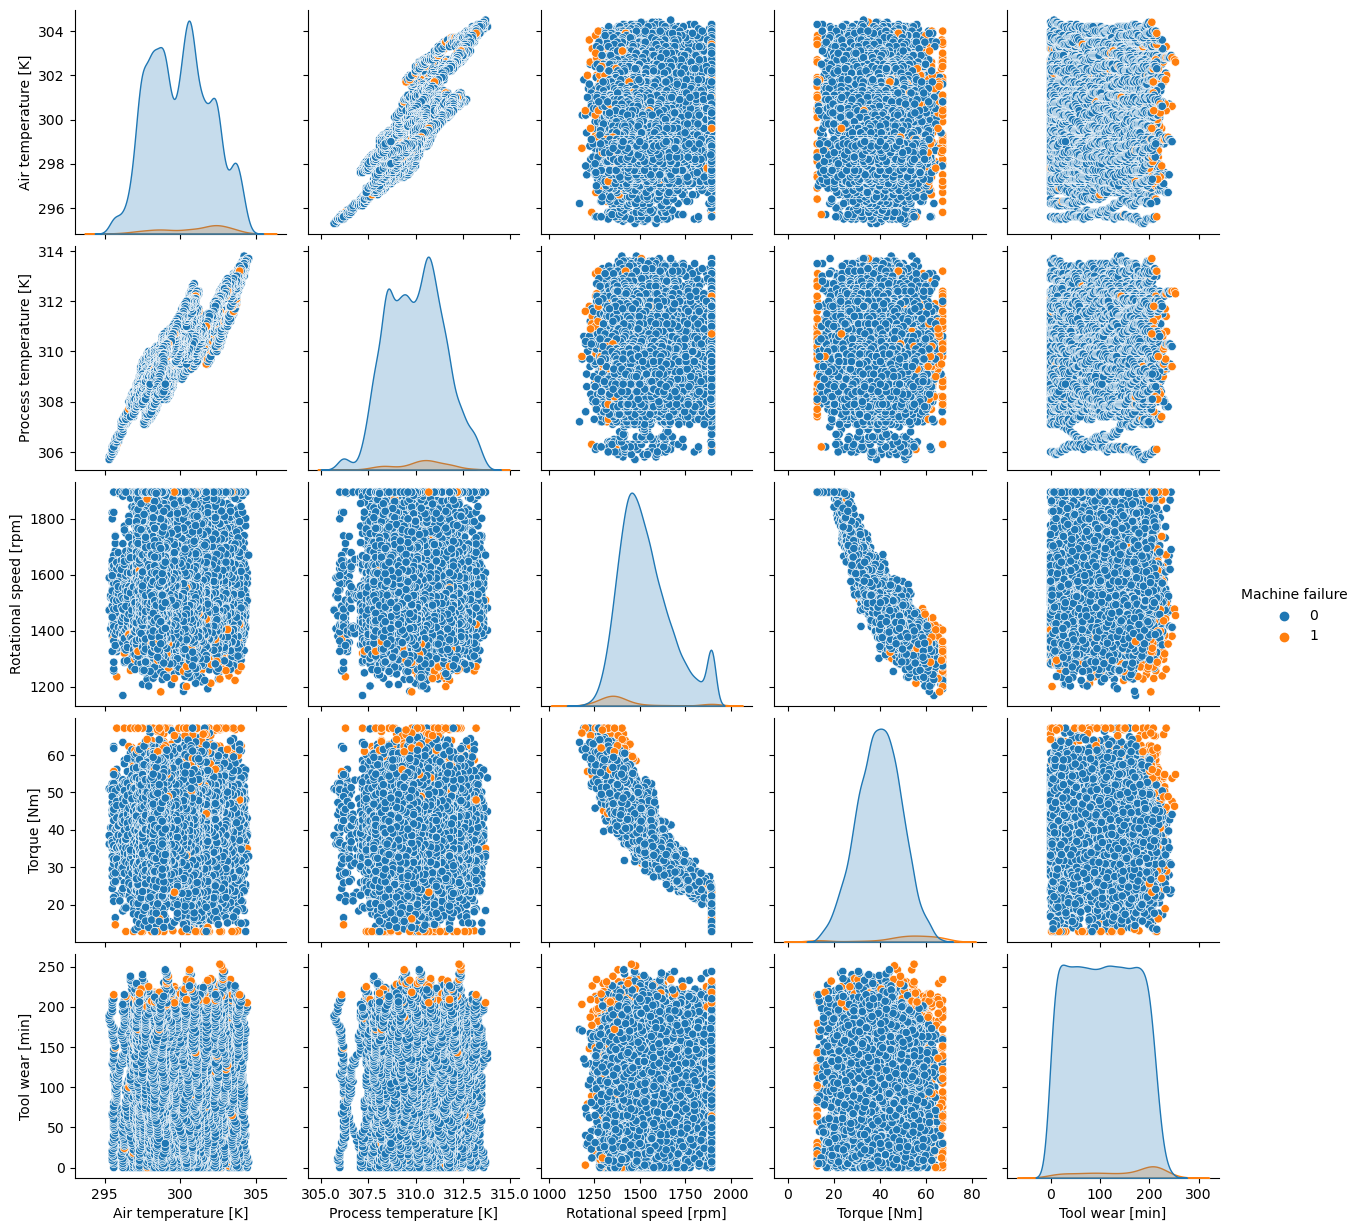

In [ ]:
tt= data_new[["Air temperature [K]" ,"Process temperature [K]","Rotational speed [rpm]",
        "Torque [Nm]","Tool wear [min]","Machine failure"]]
sns.pairplot(tt ,hue="Machine failure")

#### Correlation matrix

<Axes: >

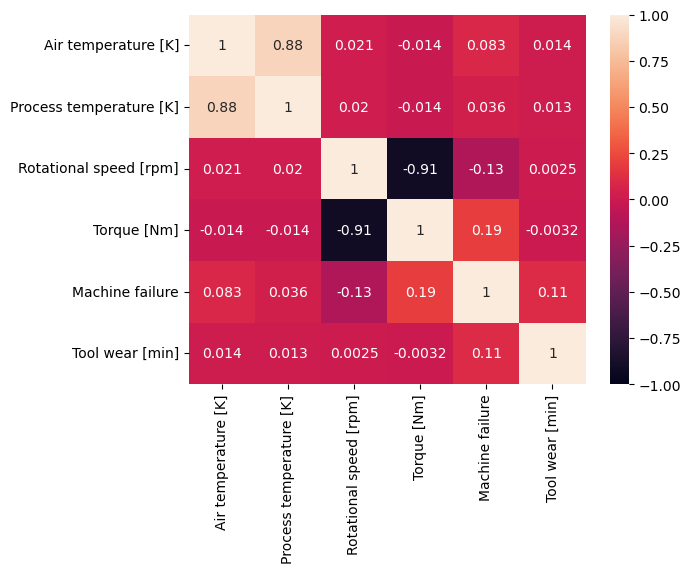

In [ ]:
tt= data_new[["Air temperature [K]" ,"Process temperature [K]","Rotational speed [rpm]",
        "Torque [Nm]","Machine failure","Tool wear [min]"]]
tt_corr = tt.corr()
sns.heatmap(tt_corr,vmin=-1 , vmax=1, annot=True)

#### Correlation matrix for each variables

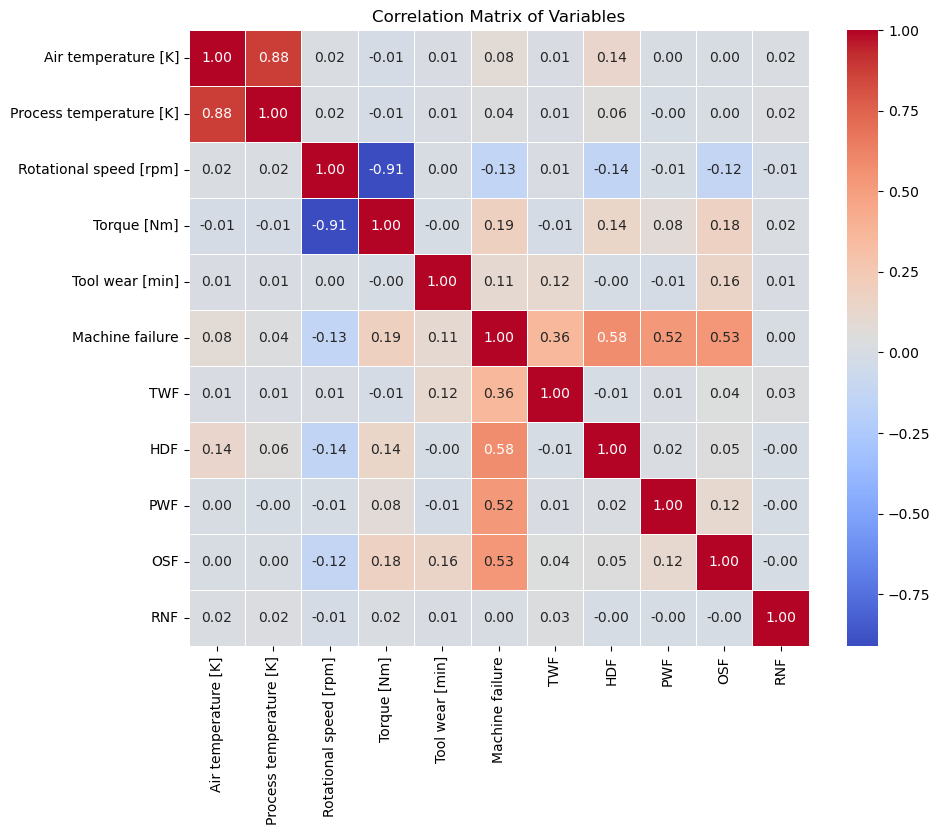

In [ ]:
# Compute the correlation matrix
correlation_matrix = data_new.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Variables')
plt.show()

In [ ]:
data_new

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,0


In [ ]:
data_new.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1530.142500,39.983490,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,148.798499,9.914623,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,12.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,1895.500000,67.200000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Feature Engineering

#### Data enconding using one hot encoding

In [ ]:
# One-hot encode categorical variables
data_new_encoded = pd.get_dummies(data_new, columns=['Type'])
data_new_encoded

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0,0,1,0
2,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0,0,1,0
3,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0,0,1,0
4,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,0,0,0,1
9996,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,0,1,0,0
9997,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,0,0,0,1
9998,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,0,1,0,0


#### Feature Selection 

In [ ]:
X = data_new_encoded.drop(['Machine failure'], axis = 1)
y = data_new_encoded['Machine failure']

In [ ]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551.0,42.8,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408.0,46.3,3,0,0,0,0,0,0,1,0
2,298.1,308.5,1498.0,49.4,5,0,0,0,0,0,0,1,0
3,298.2,308.6,1433.0,39.5,7,0,0,0,0,0,0,1,0
4,298.2,308.7,1408.0,40.0,9,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14,0,0,0,0,0,0,0,1
9996,298.9,308.4,1632.0,31.8,17,0,0,0,0,0,1,0,0
9997,299.0,308.6,1645.0,33.4,22,0,0,0,0,0,0,0,1
9998,299.0,308.7,1408.0,48.5,25,0,0,0,0,0,1,0,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

#### Split data into train(80%) and test(20%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8000, 13)

In [ ]:
X_test.shape

(2000, 13)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

### Sampling

In [ ]:
# Import the necessary libraries
from imblearn.over_sampling import SMOTE

In [ ]:
# Creating an instance of SMOTE
smote = SMOTE()

# Balancing the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(y_train.value_counts())

0    7722
1     278
Name: Machine failure, dtype: int64


In [ ]:
print(y_resampled.value_counts())

0    7722
1    7722
Name: Machine failure, dtype: int64


## Model Building

#### Build logicstic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model

LogisticRegression()

In [ ]:
model.fit(X_resampled, y_resampled)

C:\Users\prati\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(2000,)

In [ ]:
a = accuracy_score(y_test,y_pred)
a

0.9575

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

In [ ]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.9575
Precision: 0.4154929577464789
Recall: 0.9672131147540983
F1-score: 0.5812807881773399
ROC-AUC score: 0.9843843793065548


#### Build Random Forest Classifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model2 = RandomForestClassifier(n_estimators=160 ,min_samples_leaf=50, 
                              max_depth=5,max_leaf_nodes=3 ,criterion='entropy' )

In [ ]:
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=3,
                       min_samples_leaf=50, n_estimators=160)

In [ ]:
y_predict_train = model2.predict(X_test)

In [ ]:
b = accuracy_score(y_test,y_predict_train)
b

0.8855

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_predict_train)
precision = precision_score(y_test, y_predict_train)
recall = recall_score(y_test, y_predict_train)
f1 = f1_score(y_test, y_predict_train)
roc_auc = roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])

In [ ]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.8855
Precision: 0.18421052631578946
Recall: 0.8032786885245902
F1-score: 0.2996941896024464
ROC-AUC score: 0.9448000067636688


#### Build XGBClassifier model

In [ ]:
from xgboost import XGBClassifier

model3 = XGBClassifier(n_estimators=10 ,min_samples_leaf=60, 
                              max_depth=3,max_leaf_nodes=3 ,criterion='entropy' )

In [ ]:
model3.fit(X_train.to_numpy(), y_train)

C:\Users\prati\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:59:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "criterion", "max_leaf_nodes", "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaf_nodes=3,
              max_leaves=None, min_child_weight=None, min_samples_leaf=60,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=10, ...)

In [ ]:
y_predict = model3.predict(X_test)

In [ ]:
c = accuracy_score(y_test,y_predict)
c

0.999

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, model3.predict_proba(X_test)[:,1])

In [ ]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.999
Precision: 1.0
Recall: 0.9672131147540983
F1-score: 0.9833333333333333
ROC-AUC score: 0.9823806423794587


#### Build SVC model

In [ ]:
from sklearn.svm import SVC 

logr = SVC(probability=True)

In [ ]:
logr.fit(X_resampled, y_resampled)

SVC(probability=True)

In [ ]:
y_predict_svc = logr.predict(X_test)

In [ ]:
d = accuracy_score(y_test,y_predict_svc)
d

0.7825

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_predict_svc)
precision = precision_score(y_test, y_predict_svc)
recall = recall_score(y_test, y_predict_svc)
f1 = f1_score(y_test, y_predict_svc)
roc_auc = roc_auc_score(y_test, logr.predict_proba(X_test)[:,1])

In [ ]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.7825
Precision: 0.10548523206751055
Recall: 0.819672131147541
F1-score: 0.18691588785046728
ROC-AUC score: 0.8670347229854835


#### Build Decision Tree Classifier model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(min_samples_leaf=50, 
                              max_depth=10,max_leaf_nodes=1000 ,criterion='gini' )

In [ ]:
model5.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=1000, min_samples_leaf=50)

In [ ]:
y_predict_DT = model5.predict(X_test)

In [ ]:
e = accuracy_score(y_test,y_predict_DT)
e

0.953

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_predict_DT)
precision = precision_score(y_test, y_predict_DT)
recall = recall_score(y_test, y_predict_DT)
f1 = f1_score(y_test, y_predict_DT)
roc_auc = roc_auc_score(y_test, model5.predict_proba(X_test)[:,1])

In [ ]:
# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)

Accuracy: 0.953
Precision: 0.38926174496644295
Recall: 0.9508196721311475
F1-score: 0.5523809523809524
ROC-AUC score: 0.9768471157179213


#### Create dataframe with accuracy results for all models

In [ ]:
accuracyy = np.array([[a,'LogisticRegression'],
                      [b,'RandomForestClassifier'],
                      [c,'XGBClassifier'],
                      [d,'SVC classifier'],
                      [e,'DecisionTreeClassifier']])

In [ ]:
column_names = ['Accuracy', 'Model']

In [ ]:
df = pd.DataFrame(accuracyy, columns=column_names)

In [ ]:
df

,Accuracy,Model
0,0.9575,LogisticRegression
1,0.8855,RandomForestClassifier
2,0.999,XGBClassifier
3,0.7825,SVC classifier
4,0.953,DecisionTreeClassifier


#### Classification reports for each model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Logistic Regression Model report: \n\n", classification_report(y_test, y_pred))

Logistic Regression Model report: 

               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1939
           1       0.42      0.97      0.58        61

    accuracy                           0.96      2000
   macro avg       0.71      0.96      0.78      2000
weighted avg       0.98      0.96      0.97      2000



In [ ]:
print("Random Forest Classifier Model report: \n\n", classification_report(y_test, y_predict_train))

Random Forest Classifier Model report: 

               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1939
           1       0.18      0.80      0.30        61

    accuracy                           0.89      2000
   macro avg       0.59      0.85      0.62      2000
weighted avg       0.97      0.89      0.92      2000



In [ ]:
print("XGBClassifier Model report: \n\n", classification_report(y_test, y_predict))

XGBClassifier Model report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
print("SVC classifier Model report: \n\n", classification_report(y_test, y_predict_svc))

SVC classifier Model report: 

               precision    recall  f1-score   support

           0       0.99      0.78      0.87      1939
           1       0.11      0.82      0.19        61

    accuracy                           0.78      2000
   macro avg       0.55      0.80      0.53      2000
weighted avg       0.97      0.78      0.85      2000



In [ ]:
print("Decision Tree Classifier Model report: \n\n", classification_report(y_test, y_predict_DT))

Decision Tree Classifier Model report: 

               precision    recall  f1-score   support

           0       1.00      0.95      0.98      1939
           1       0.39      0.95      0.55        61

    accuracy                           0.95      2000
   macro avg       0.69      0.95      0.76      2000
weighted avg       0.98      0.95      0.96      2000



### We are selecting Logicstic regression model as our final model